Along this file some hints, suggestions and guides will be written to ease the development of the task.

# Assignment 1
### Anas Puthawala, A20416308, ECE566 F22

##Preliminary Code:

### Imports:

In [82]:
import numpy as np
#from numpy import random
import random
import matplotlib.pyplot as plt
import time
from scipy.stats import norm
#Hint: use numpy.random to create random behaviours
#Hint: use matplotlib.pyplot to present visual data

## Part 1: Monty Hall Problem

Design two different strategies to carry out the Monty Hall decision problem. Compare the results.

More information: https://en.wikipedia.org/wiki/Monty_Hall_problem

First we start off by defining a function `single_trial` which simulates one single trial of the monty hall problem (i.e. you choose a door, another door is revealed with a goat behind it, and you can either choose to switch or not by the variable `switch` that the function takes in as an argument)

In [137]:
def single_trial(switch:bool, ndoors=3):

    # Pick a random door out of the ndoors available
    chosen_door = random.randint(1, ndoors)
    available_doors = []
    #print(chosen_door)

    if switch == True:
        # Reveal a goat
        if chosen_door == 2:
            revealed_door = 3
        else:
            revealed_door = 2


        # Make the switch by choosing any other door than the initially-
        # selected one and the one just opened to reveal a goat. 
        for num in range(1, ndoors+1):
            if num not in (chosen_door, revealed_door):
                available_doors.append(num)
        #available_doors = [dnum for dnum in range(1,ndoors+1)
         #                       if dnum not in (chosen_door, revealed_door)]
        chosen_door = random.choice(available_doors)

    elif not switch:
        # do not switch
        pass
    
    # You win if you picked door number 1
    return chosen_door == 1



Next we define the function `run_trials` which effectively runs the `single_trial` function N amount of times where N is an input to the function (named `trials`). You also must define wether or not you want to switch and pass that in as an argument (`switch`)

In [133]:
def run_trials(trials, switch):

    wins = 0
    #Run the trials 
    for i in range(trials):
        if single_trial(switch): #Checks to see if you win
            wins += 1 #If you win, increment by 1

    return wins

Our final step consists of running the simulation for many trials and analyzing the percentage of wins as a result of switching doors and not switching doors

### Running the simulation for trials = 100, 500, 1000, 10000

In [138]:
trials_list = [100, 500, 1000, 10000, 100000, 1000000]
for trials in trials_list:
    print('---------------------------------------------------------------------------------')
    wins_no_switch = run_trials(trials, switch = False)
    print(f'Percentage of wins in {trials} trials without switching: {(wins_no_switch/trials)*100}%')
    wins_switch = run_trials(trials, switch = True)
    print(f'Percentage of wins in {trials} with switching: {(wins_switch/trials) * 100}%')
    print('---------------------------------------------------------------------------------')

---------------------------------------------------------------------------------
Percentage of wins in 100 trials without switching: 31.0%
Percentage of wins in 100 with switching: 68.0%
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Percentage of wins in 500 trials without switching: 30.8%
Percentage of wins in 500 with switching: 65.4%
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Percentage of wins in 1000 trials without switching: 33.4%
Percentage of wins in 1000 with switching: 66.0%
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Percentage of wins in 10000 trials without switching: 33.17%
Percentage of wins in 10000 with switching: 6

We can see that as the trials increase, the proportion of winning the gameshow without switching approaches 1/3 (i.e. .33333) and the proportion of winning the gameshow WITH switching approaches 2/3 (i.e. .6666). So in essence, with this simulation we can conclude that it's much better to switch if you select a door and a goat is revealed.

## Part 2: Central Limit Theorem

Prove the Central Limit Theorem through a simple experiment.

Compare experiment with the theoretical equivalent gaussian curve.

More information: https://en.wikipedia.org/wiki/Central_limit_theorem

In [32]:
### Suggestion: consider the rolls of a die.

### Experiment: 
# Measure the height (in cm) of 1000 randomly selected males from the population, repeat this 5, 10, 50, 100, 10000 times to effectively see the CLT in action

# The heights of 1000 men can be simulated using np.random.choice and we'll choose the range to be from 140cm (4'7) to 198cm (~6'6)

def simulate(n):

    sample_means = []
    sample_stddev = []
    sample_variance = []


    for _ in range(n):
        sample = np.random.choice(np.arange(140, 198), 1000)
        
        sample_means.append(np.mean(sample))
        


    print(f"The sample means' standard deviation is: {np.std(sample_means)}\nThe sample means' variance is: {np.var(sample_means)}\nThe sample means' median is: {np.median(sample_means)}\nThe sample means' mean is: {np.mean(sample_means)}")    
    plt.hist(sample_means)
    #sample_stddev.append(np.std(sample))
    #sample_variance.append(np.var(sample))
    #plt.plot(sample_stddev)
    #plt.plot(sample_variance)
    plt.title(f'Sample means for {n} trials')
    plt.xlabel('Sample mean')
    plt.ylabel('Count')

The sample means' standard deviation is: 0.30991702115243847
The sample means' variance is: 0.09604856000000099
The sample means' median is: 168.24
The sample means' mean is: 168.3068


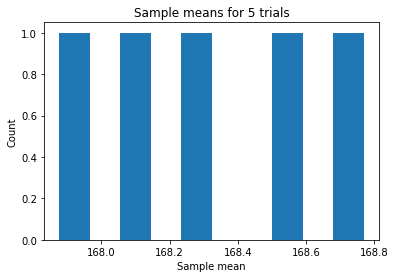

In [33]:
simulate(n=5)

The sample means' standard deviation is: 0.7098557952147725
The sample means' variance is: 0.503895249999997
The sample means' median is: 168.552
The sample means' mean is: 168.3965


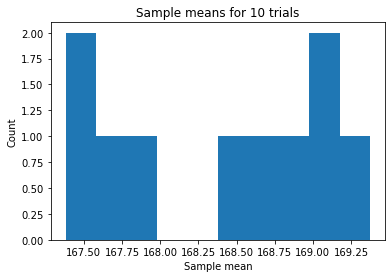

In [24]:
simulate(n=10)

The sample means' standard deviation is: 0.5164124878428082
The sample means' variance is: 0.2666818575999985
The sample means' median is: 168.4395
The sample means' mean is: 168.44531999999998


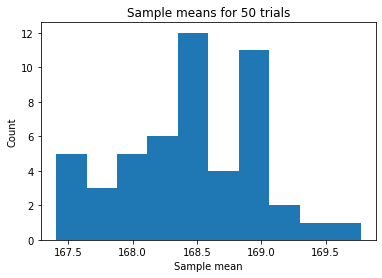

In [25]:
simulate(n=50)

The sample means' standard deviation is: 0.5749370375093259
The sample means' variance is: 0.3305525971
The sample means' median is: 168.45749999999998
The sample means' mean is: 168.51376999999997


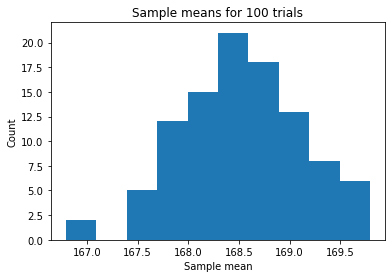

In [26]:
simulate(n=100)

The sample means' standard deviation is: 0.5348837085213102
The sample means' variance is: 0.28610058164150987
The sample means' median is: 168.494
The sample means' mean is: 168.49202929999998


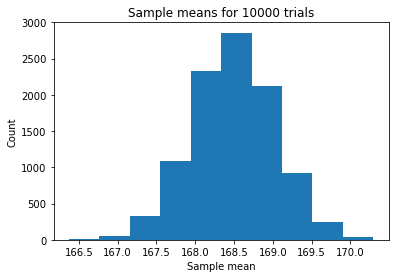

In [27]:
simulate(n=10000)

In [34]:
def theoretical_curve():
    ### Theoretical gaussian curve:
    # To get as close to theoretical gaussian curve we'll just generate a BUNCH more data and see the results we get.
    print('Theoretical Curve')
    sample_means = []
    for _ in range(100000):
            sample = np.random.choice(np.arange(140, 198), 1000)
            
            sample_means.append(np.mean(sample))

    print(f"The sample means' standard deviation is: {np.std(sample_means)}\nThe sample means' variance is: {np.var(sample_means)}\nThe sample means' median is: {np.median(sample_means)}\nThe sample means' mean is: {np.mean(sample_means)}")    
    plt.hist(sample_means)
    #sample_stddev.append(np.std(sample))
    #sample_variance.append(np.var(sample))
    #plt.plot(sample_stddev)
    #plt.plot(sample_variance)
    plt.title(f'Sample means for {100000} trials')
    plt.xlabel('Sample mean')
    plt.ylabel('Count')
#Theoretical mean? variance?
### Representation

Theoretical Curve
The sample means' standard deviation is: 0.5276536022343423
The sample means' variance is: 0.27841832395087757
The sample means' median is: 168.501
The sample means' mean is: 168.49943284999998


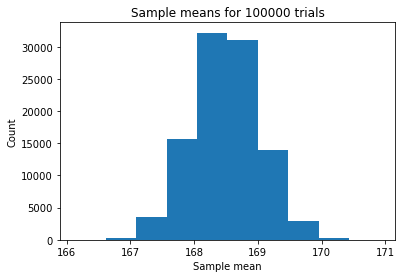

In [35]:
theoretical_curve()

Evidently, we can see that as the 'n' (the amount of times we repeat the experiment) increases, the sample mean becomes closer and closer to a normal distribution (gaussian). That's the entire basis of the central limit theorem, the sample means will portray a normal distribution. A normal distribution has a sample mean = to the sample median and that's one of the signs we see in our simulation that as we increase the trials, the sample mean gets closer and closer to being equal to the sample median.

If we compare our simulated curves with only 10, 50, 100 trials etc to the one we just generated with 100,000 trials we can see that as the number of trials increases, we get closer and closer to the ideal gaussian curve as seen above (and the mean, standard deviation, variance, and median also all approach those values). Lastly, we can also use the PDF to generate a curve following a guassian distribution and compare it to the histograms we recieved above:

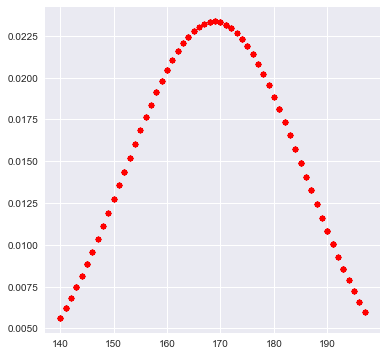

In [76]:
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
    
# To generate an array of x-values
x = np.random.choice(np.arange(140, 198),1000)
  
# To generate an array of
# y-values using corresponding x-values
y = pdf(x)
  
# Plotting the bell-shaped curve
plt.figure(figsize = (6, 6))
#plt.plot(x, y, linestyle = 'dotted')
  
plt.scatter(x, y, marker = 'o', s = 25, color = 'red')
plt.show()

Just looking at it we can see how the median and mean tend to fall very closely to the mean and medians observed above in the simulated plot with a lot of trials (100k)